#### 2D space filling curves
In this notebook you will find diferent 2d space filling curves. This curves could be stacked up to make a cube. The resolution of the curves are fixed by the nozzle.

In [1]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
from py2gcode import py2gcode

In [2]:
# functions to create a hilbert curve modified from https://www.geeksforgeeks.org/python-hilbert-curve-using-turtle/ 

def rot(v,angle):
    angle = np.deg2rad(angle)
    r = np.array([[np.cos(angle),-np.sin(angle)],
                  [np.sin(angle),np.cos(angle)]])
    v = r.dot(v)
    return v
def foward(v,p):
    p.append(v)
def hilbert(v,angle,n,p):
    if n>0:
        v = rot(v,angle)
        p =hilbert(v,-angle, n-1,p)
        foward(v,p)
        v = rot(v,-angle)
        p =hilbert(v,angle, n-1,p)
        foward(v,p)
        p =hilbert(v,angle, n-1,p)
        v = rot(v,-angle)
        foward(v,p)
        p =hilbert(v,-angle, n-1,p)
        v = rot(v,angle)
    return p

In [3]:
d_filament = 1.75
d_nozzle = 0.4
z_layer = 0.24
v = np.array([2*d_nozzle,0]) # unit vector 
p = [np.array([0,0])] # somewhere to store the positions.
p = hilbert(v,90, 4,p) # generate the vectors

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

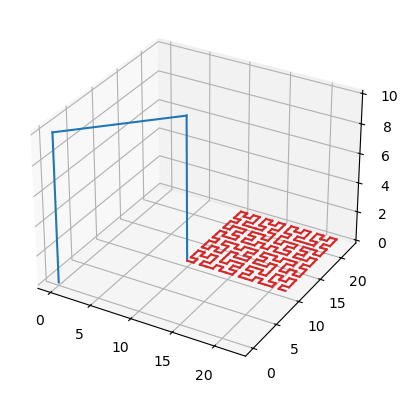

In [ ]:
# call py2gcode to generate the gcode
pgcode = py2gcode(material_diameter=d_filament,nozzle_diameter=d_nozzle)
pgcode.go_home()
pgcode.feed = 600
z_rep = 10.0 # go to 
pgcode.move_abs(z = 10.0)
pgcode.set_temp(tem = 210.0) # set the head temperature

pgcode.move_abs(x = 10.0,y = 10.0)
pgcode.move_abs(z = z_layer)
for pi in p:
    pgcode.move(x = pi[0],y = pi[1],extrude = True)
#pgcode.move_abs(z = 10.0)
pgcode.plot() # with a arbitrary aspect ratio



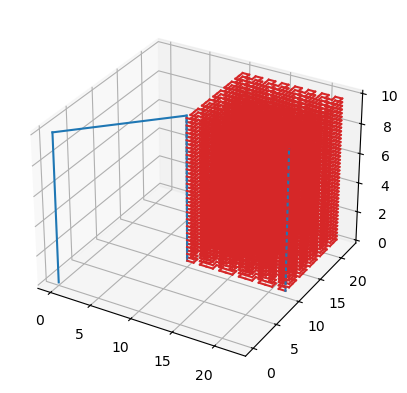

In [ ]:
# now the pattern can be staked up N times, every time we will flip the order of following the pattern.
N = (10.0/z_layer)
for _ in range(int(N/2)):
    pgcode.move(z = z_layer)
    for pi in reversed(p):
        pgcode.move(x = -pi[0],y = -pi[1],extrude = True)   
    pgcode.move(z = z_layer)
    for pi in p:
        pgcode.move(x = pi[0],y = pi[1],extrude = True)   
pgcode.plot() # with a arbitrary aspect ratio
#pgcode.out('hilbert_pattern') 